You are working as a data scientist in a
global finance company. Over the
years, the company has collected basic
bank details and gathered a lot of
credit-related information. The
management wants to build an
intelligent system to segregate the
people into credit score brackets to
reduce the manual efforts. Given a
person’s credit-related information,
build a machine learning model that
can classify the credit score.

Attributes Description

ID - unique identification of an entry

Customer_ID - unique identification of a person

Month - month of the year

Name - name of a person

Age - age of the person

SSN - social security number of a person

Occupation - occupation of the person

Annual_Income - annual income of the person

Monthly_Inhand_Salary - monthly base salary of a person

Num_Bank_Accounts - number of bank accounts a person holds

Num_Credit_Card - number of other credit cards held by a person

Interest_Rate - interest rate on credit card

Num_of_Loan - number of loans taken from the bank

Type_of_Loan - types of loan taken by a person

Delay_from_due_date - average number of days delayed from
the payment date

Num_of_Delayed_Payment - age of the person

Changed_Credit_Limit - percentage change in credit card limit

Num_Credit_Inquiries - number of credit card inquiries

Credit_Mix - classification of the mix of credits

Outstanding_Debt - remaining debt to be paid (in USD)

Credit_Utilization_Ratio - utilization ratio of credit card

Credit_History_Age - the age of credit history of the person

Payment_of_Min_Amount - the minimum amount was paid by the
person

Total_EMI_per_month - monthly EMI payments (in USD)

Amount_Invested_monthly - monthly amount invested by the
customer (in USD)

Payment_Behaviour - payment behavior of the customer (in
USD)

Monthly_Balance - monthly balance amount of the customer
(in USD)

Credit_Score - the bracket of credit score

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Loading the data and removing unnecessary columns from the dataframe

df = pd.read_csv('credit_score.csv', low_memory=False)
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [6]:
df.shape

(100000, 28)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [8]:
df = df.drop(columns=['ID', 'Customer_ID', 'Name', 'SSN', 'Type_of_Loan', 'Credit_History_Age'])

#### Checking the shape of a dataframe and datatypes of all columns along with calculating the statistical data

In [15]:
print("Shape: ",df.shape, "\n")

Shape:  (100000, 22) 



In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       100000 non-null  object 
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  object 
 4   Monthly_Inhand_Salary     84998 non-null   float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  object 
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    92998 non-null   object 
 11  Changed_Credit_Limit      100000 non-null  object 
 12  Num_Credit_Inquiries      98035 non-null   float64
 13  Credit_Mix                100000 non-null  ob

In [17]:
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [18]:
# Checking out the missing values in a dataframe

df.isnull().sum()

Month                           0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

## Data Cleaning

In [20]:
df.dtypes

Month                        object
Age                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                 object
dtype: object

In [21]:
df['Age'] = df["Age"].str.replace('_', '')
df['Age'] = df['Age'].astype(int)

In [25]:
df['Occupation'] = df['Occupation'].replace('_______', np.nan)
df['Occupation'].dtype

dtype('O')

In [26]:
df['Annual_Income'] = df['Annual_Income'].str.replace('_', '')
df['Annual_Income'] = df['Annual_Income'].astype(float)

In [27]:
df['Num_of_Loan'] = df['Num_of_Loan'].str.replace('_', '')
df['Num_of_Loan'] = df['Num_of_Loan'].astype(int)

In [28]:
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].str.replace('_', '')
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].astype(float)

In [29]:
df['Credit_Score'] = df['Credit_Score'].replace(['Poor', 'Standard', 'Good'], [0, 1, 2])

In [35]:
df['Monthly_Balance'] = df['Monthly_Balance'].replace('_', '')
df['Monthly_Balance'] = pd.to_numeric(df['Monthly_Balance'], errors='coerce')
# df['Monthly_Balance'] = df['Monthly_Balance'].astype(float)

In [36]:
df['Monthly_Balance'].dtypes

dtype('float64')

In [37]:
df['Payment_Behaviour'] = df['Payment_Behaviour'].replace('!@9#%8', np.nan)

In [38]:
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].str.replace('_', '')
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].astype(float)

In [41]:
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].replace('NM', 'No')
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].replace(['Yes','No'], [1, 0])

In [42]:
df['Outstanding_Debt'] = df['Outstanding_Debt'].str.replace('_', '')
df['Outstanding_Debt'] = df['Outstanding_Debt'].astype(float)

In [43]:
df['Credit_Mix'] = df['Credit_Mix'].replace('_', np.nan)
df['Credit_Mix'] = df['Credit_Mix'].replace(['Standard', 'Good', 'Bad'], [1, 2, 0])

In [44]:
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].replace('_', np.nan)
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].astype(float)

In [45]:
df.dtypes

Month                        object
Age                           int32
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                   int32
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                  float64
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Payment_of_Min_Amount         int64
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                  int64
dtype: object

In [46]:
df.head(3)

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23,Scientist,19114.12,1824.843333,3,4,3,4,3,...,4.0,NaN,809.98,26.822620,0,49.574949,80.415295,High_spent_Small_value_payments,312.494089,2
1,February,23,Scientist,19114.12,NaN,3,4,3,4,-1,...,4.0,2.0,809.98,31.944960,0,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,2
2,March,-500,Scientist,19114.12,NaN,3,4,3,4,3,...,4.0,2.0,809.98,28.609352,0,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,2


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       100000 non-null  int32  
 2   Occupation                92938 non-null   object 
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     84998 non-null   float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  int32  
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    92998 non-null   float64
 11  Changed_Credit_Limit      97909 non-null   float64
 12  Num_Credit_Inquiries      98035 non-null   float64
 13  Credit_Mix                79805 non-null   fl

In [48]:
df.isnull().sum()

Month                           0
Age                             0
Occupation                   7062
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Credit_Mix                  20195
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour            7600
Monthly_Balance              1209
Credit_Score                    0
dtype: int64

After replacing the
special characters with
null value. The new
missing value is shown
in the figure. Here
Forward and backward
filling method is used
to fill the missing
values.

In [50]:
df = df.fillna(method = 'ffill')
df = df.fillna(method = 'bfill')
df.isnull().sum()

Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

removing outliers
from age since all
other columns
values are
relevant

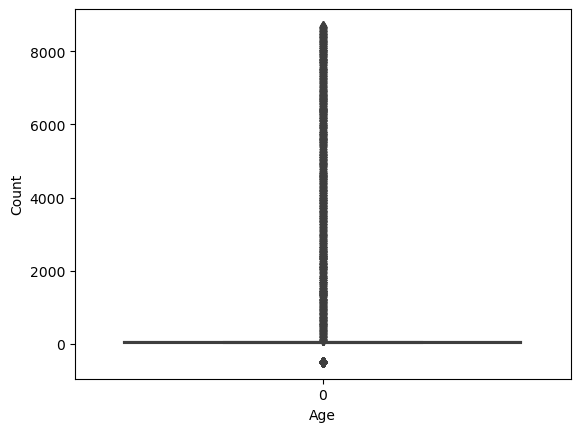

In [51]:
sns.boxplot(df['Age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

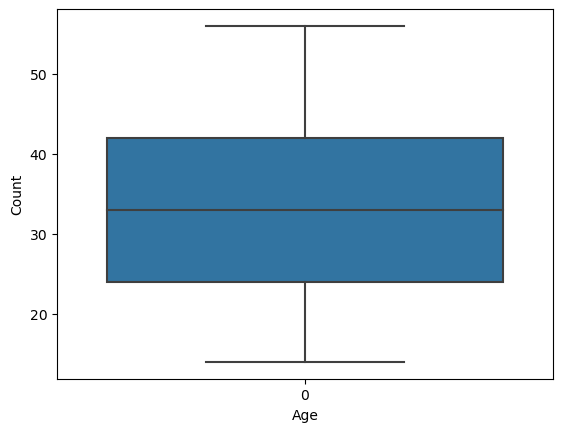

In [52]:
col_names = ['Age']

Q1 = df.Age.quantile(0.25)

Q3 = df.Age.quantile(0.75)

IQR = Q3 - Q1

data = df[(df.Age >= Q1 - 1.5 * IQR) & (df.Age <= Q3 + 1.5 * IQR)]
sns.boxplot(data['Age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [53]:
df.dtypes

Month                        object
Age                           int32
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                   int32
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                  float64
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Payment_of_Min_Amount         int64
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                  int64
dtype: object

In [57]:
# Performing One Hot Encoding for categorical features of a dataframe

In [54]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Month'] = le.fit_transform(df['Month'])
df['Occupation'] = le.fit_transform(df['Occupation'])
df['Payment_Behaviour'] = le.fit_transform(df['Payment_Behaviour'])

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  int32  
 1   Age                       100000 non-null  int32  
 2   Occupation                100000 non-null  int32  
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     100000 non-null  float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  int32  
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    100000 non-null  float64
 11  Changed_Credit_Limit      100000 non-null  float64
 12  Num_Credit_Inquiries      100000 non-null  float64
 13  Credit_Mix                100000 non-null  fl

# Feature Selection

In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

col_list = []

# Iterate through columns of df
for col in df.columns:
    # Check if the column is not of type object and is not the target variable 'Credit_Score'
    if (df[col].dtype != 'object') and (col != 'Credit_Score'):
        col_list.append(col)
        
X = df[col_list]
vif_data = pd.DataFrame()
vif_data['Features'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

                    Features        VIF
0                      Month   3.238823
1                        Age   1.025871
2                 Occupation   3.491408
3              Annual_Income   1.016299
4      Monthly_Inhand_Salary   5.265378
5          Num_Bank_Accounts   1.021390
6            Num_Credit_Card   1.030084
7              Interest_Rate   1.024167
8                Num_of_Loan   1.003243
9        Delay_from_due_date   5.246420
10    Num_of_Delayed_Payment   1.018903
11      Changed_Credit_Limit   4.579602
12      Num_Credit_Inquiries   1.020950
13                Credit_Mix   7.359466
14          Outstanding_Debt   4.965007
15  Credit_Utilization_Ratio  23.936412
16     Payment_of_Min_Amount   3.590880
17       Total_EMI_per_month   1.028377
18   Amount_invested_monthly   1.104411
19         Payment_Behaviour   3.891133
20           Monthly_Balance  10.927964


Selecting the features using VIF. VIF should be less than 5. , So we will drop the column and 
excute the above code again select all the features.

In [64]:
# vif_data.drop(columns='Credit_Utilization_Ratio')

### Remove or combine Features with high VIF:

In [67]:
# Remove features with high VIF one at a time and recalculate VIF

# Removing 'Credit_Utilization_Ratio' due to high VIF

X = X.drop(columns = ['Credit_Utilization_Ratio'])

# Recalculate VIF
vif_data = pd.DataFrame()
vif_data['Features'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# Print VIF data again
print(vif_data)

                   Features       VIF
0                     Month  3.157038
1                       Age  1.025481
2                Occupation  3.399459
3             Annual_Income  1.016102
4     Monthly_Inhand_Salary  5.264404
5         Num_Bank_Accounts  1.021080
6           Num_Credit_Card  1.029805
7             Interest_Rate  1.023857
8               Num_of_Loan  1.003156
9       Delay_from_due_date  4.823018
10   Num_of_Delayed_Payment  1.018670
11     Changed_Credit_Limit  4.513101
12     Num_Credit_Inquiries  1.020771
13               Credit_Mix  5.543910
14         Outstanding_Debt  4.714662
15    Payment_of_Min_Amount  3.366062
16      Total_EMI_per_month  1.028037
17  Amount_invested_monthly  1.103627
18        Payment_Behaviour  3.530680
19          Monthly_Balance  9.252194


In [69]:
X = X.drop(columns = ['Monthly_Balance'])

# Recalculate VIF
vif_data = pd.DataFrame()
vif_data['Features'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# Print VIF data again
print(vif_data)

                   Features       VIF
0                     Month  3.124129
1                       Age  1.025314
2                Occupation  3.360578
3             Annual_Income  1.016066
4     Monthly_Inhand_Salary  3.059276
5         Num_Bank_Accounts  1.020979
6           Num_Credit_Card  1.029629
7             Interest_Rate  1.023821
8               Num_of_Loan  1.003077
9       Delay_from_due_date  4.686139
10   Num_of_Delayed_Payment  1.018618
11     Changed_Credit_Limit  4.498537
12     Num_Credit_Inquiries  1.020491
13               Credit_Mix  4.319987
14         Outstanding_Debt  4.691391
15    Payment_of_Min_Amount  3.315188
16      Total_EMI_per_month  1.028020
17  Amount_invested_monthly  1.102740
18        Payment_Behaviour  3.193275


In [70]:
X = df.drop(columns=['Credit_Score'])
y = df['Credit_Score']

In [73]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# Logistic Regression

In [76]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [77]:
lr.fit(X_train, y_train)

LogisticRegression()

In [78]:
y_pred = lr.predict(X_test)

In [79]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6201

In [80]:
pd.DataFrame({'Actual Values': y_test, 'Predicted Values': y_pred})

,Actual Values,Predicted Values
75721,2,2
80184,0,0
19864,2,2
76699,0,0
92991,2,2
...,...,...
32595,1,1
29313,1,1
37862,0,1
53421,1,1


# Decision Tree

In [81]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [82]:
y_pred = dt.predict(X_test)

In [83]:
accuracy_score(y_test, y_pred)

0.69615

In [85]:
pd.DataFrame({'Actual_values': y_test, 'Predicted_values': y_pred})

,Actual_values,Predicted_values
75721,2,2
80184,0,0
19864,2,2
76699,0,0
92991,2,2
...,...,...
32595,1,1
29313,1,1
37862,0,1
53421,1,1


# Hyperparameter Tuning on Decision Tree

In [86]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_features': ['log2', 'sqrt', 'auto'],
             'criterion': ['entropy', 'gini'],
             'max_depth': [2, 3, 5, 10, 50],
             'min_samples_split': [2, 3, 50, 100],
             'min_samples_leaf': [1, 5, 8, 10]
             }

In [87]:
grid_obj = GridSearchCV(dt, parameters)
grid_obj = grid_obj.fit(X_train, y_train)

C:\Users\safal\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
800 fits failed out of a total of 2400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
800 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\safal\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\safal\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\safal\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\safal\anaconda3\Lib\site-packa

In [88]:
dt = grid_obj.best_estimator_

In [89]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=50, max_features='log2',
                       min_samples_leaf=8, min_samples_split=100)

In [90]:
y_pred = dt.predict(X_test) 

In [91]:
acc_dt = round((accuracy_score(y_test, y_pred) * 100), 2) 
acc_dt

70.25

# Random Forest

In [93]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [94]:
y_pred = rfc.predict(X_test)

accuracy_score(y_test, y_pred)

0.79765

In [95]:
pd.DataFrame({'Actual_Values': y_test, 'Predicted_Values': y_pred})

,Actual_Values,Predicted_Values
75721,2,2
80184,0,0
19864,2,2
76699,0,0
92991,2,2
...,...,...
32595,1,1
29313,1,1
37862,0,1
53421,1,1
